<a href="https://colab.research.google.com/github/phoumithona/matrix_computation/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

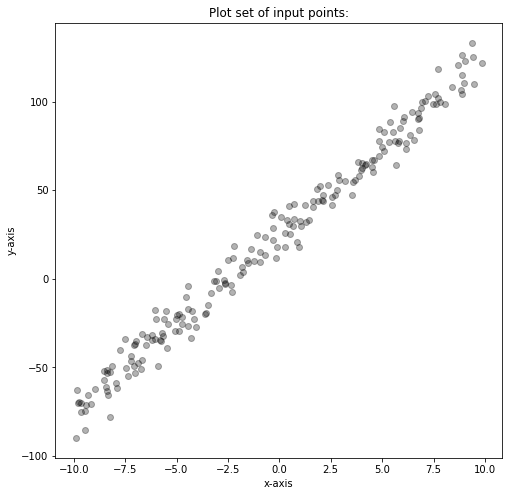

In [13]:
import numpy as np
from matplotlib import pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color = 'k', alpha=0.3)
plt.title('Plot set of input points:')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()